## Multiple Linear Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df_index=pd.read_csv('economic_index.csv')

In [15]:
df_index.head()

,Year,Month,Interest Rate,Inflation Rate,Unemployment Rate,GDP Growth,Index Price
0,2021,5,5.65,5.27,6.63,2.09,3756.63
1,2021,11,5.86,6.71,7.66,0.91,3653.19
2,2021,6,2.37,2.24,3.57,2.86,4301.40
3,2024,4,3.79,4.19,3.56,3.21,4393.21
4,2023,3,2.58,3.65,3.12,3.93,4418.78


In [22]:
## drop unnecessary columns
df_index.drop(columns=['Year','Month','GDP Growth','Inflation Rate'],axis=1,inplace=True)

In [23]:
df_index.head()

,Interest Rate,Unemployment Rate,Index Price
0,5.65,6.63,3756.63
1,5.86,7.66,3653.19
2,2.37,3.57,4301.40
3,3.79,3.56,4393.21
4,2.58,3.12,4418.78


In [24]:
## check null values
df_index.isnull().sum()

Interest Rate        0
Unemployment Rate    0
Index Price          0
dtype: int64

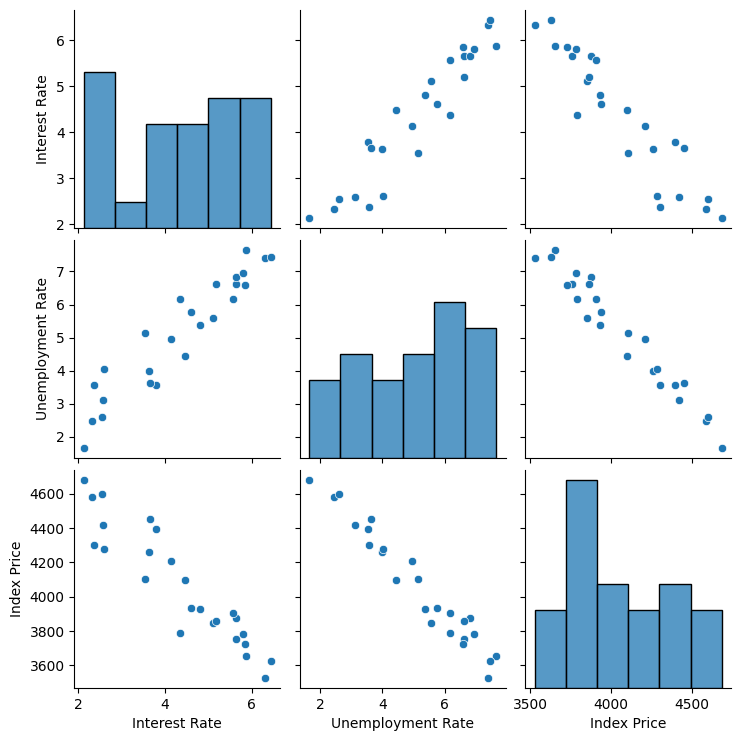

In [25]:
## let's do some visualization
import seaborn as sns
sns.pairplot(df_index)

In [27]:
df_index.corr()

,Interest Rate,Unemployment Rate,Index Price
Interest Rate,1.000000,0.942374,-0.92944
Unemployment Rate,0.942374,1.000000,-0.97630
Index Price,-0.929440,-0.976300,1.00000


Text(0, 0.5, 'Unemployment Rate')

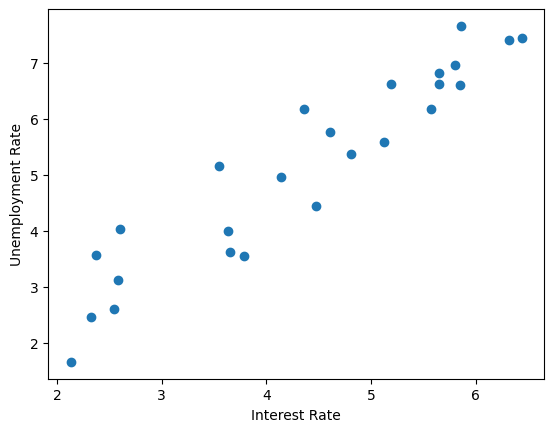

In [ ]:
## Visualize the datapoints more closely
plt.scatter(df_index['Interest Rate'],df_index['Unemployment Rate'])
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

In [32]:
## independent and dependent features
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [33]:
X.head()

,Interest Rate,Unemployment Rate
0,5.65,6.63
1,5.86,7.66
2,2.37,3.57
3,3.79,3.56
4,2.58,3.12


In [35]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [36]:
import seaborn as sns

<Axes: xlabel='Interest Rate', ylabel='Index Price'>

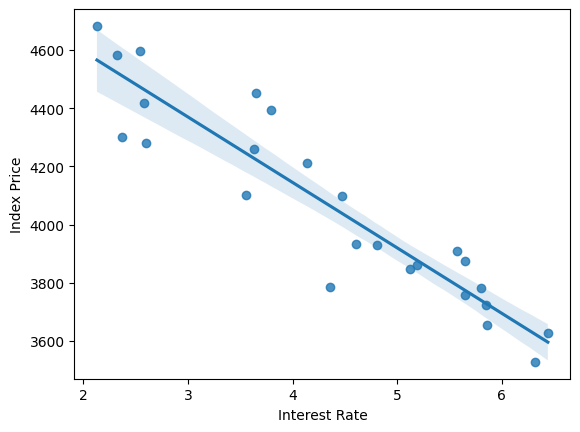

In [40]:
sns.regplot(x=df_index['Interest Rate'], y=df_index['Index Price'])

<Axes: xlabel='Interest Rate', ylabel='Unemployment Rate'>

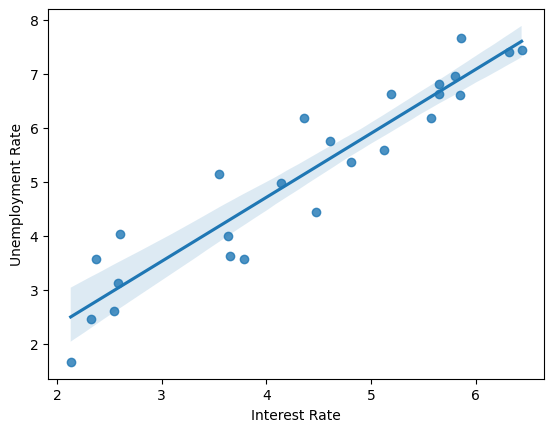

In [41]:
sns.regplot(x=df_index['Interest Rate'], y=df_index['Unemployment Rate'])

<Axes: xlabel='Index Price', ylabel='Unemployment Rate'>

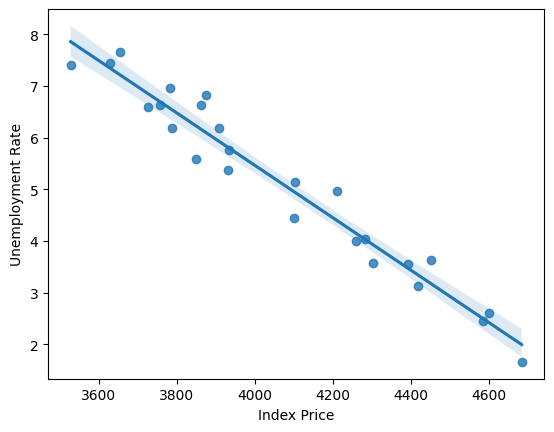

In [42]:
sns.regplot(x=df_index['Index Price'], y=df_index['Unemployment Rate'])

In [43]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [85]:
X_test

array([[-1.31296387, -1.30424637],
       [ 0.66911496,  0.47111042],
       [ 0.7179046 ,  0.68587133],
       [-1.42883925, -1.68604353],
       [ 0.7179046 ,  0.77654815],
       [-0.56282326, -0.02045342],
       [ 1.19970222,  1.07721342]])

In [48]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [49]:

regression.fit(X_train,y_train)

LinearRegression()

In [51]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [53]:
np.mean(validation_score)

np.float64(-8229.664272767854)

In [88]:
## prediction
y_pred=regression.predict(X_test)
y_pred

array([4448.63806942, 3913.49673657, 3853.47486912, 4556.06268794,
       3828.64067314, 4078.52610067, 3734.40586313])

In [55]:
## Performance Metrics
from  sklearn.metrics import mean_absolute_error,mean_squared_error

In [89]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8269.979869606637
77.31570537765609
90.93942967495803


In [57]:
from sklearn.metrics import r2_score

In [79]:
score=r2_score(y_test,y_pred)
print(score)

0.9420120738826275


In [78]:
## display adjusted R-squared
adjusted_r2=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adjusted_r2)

0.9130181108239412


### Assumptions

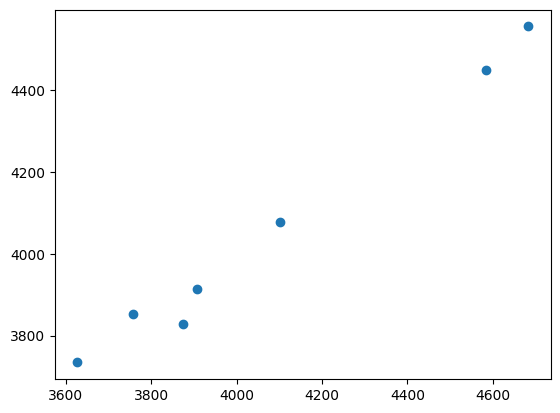

In [90]:
plt.scatter(y_test,y_pred)

In [91]:
residuals=y_test-y_pred
print(residuals)

8     134.651931
16     -5.096737
0     -96.844869
23    127.107312
11     46.659327
9      23.833899
13   -107.015863
Name: Index Price, dtype: float64


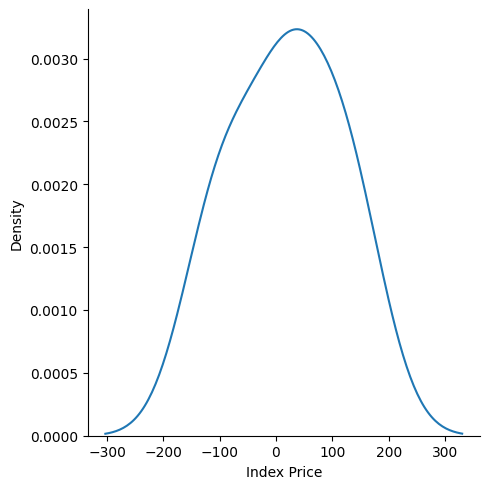

In [92]:
## Plot this residuals
sns.displot(residuals,kind='kde')

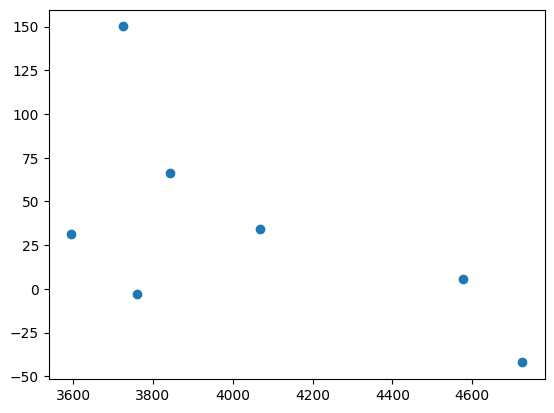

In [65]:
plt.scatter(y_pred,residuals)

In [66]:
import statsmodels.api as sm

In [67]:
model=sm.OLS(y_train,X_train).fit()

In [68]:
prediction=model.predict(X_test)
print(prediction)

[ 518.33860669 -216.93924843 -299.55598626  666.17831992 -333.75601391
    9.281878   -463.12074494]


In [69]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            Index Price   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):             -0.119
Method:                 Least Squares   F-statistic:                            0.04276
Date:                Wed, 26 Feb 2025   Prob (F-statistic):                       0.958
Time:                        16:57:12   Log-Likelihood:                         -175.10
No. Observations:                  18   AIC:                                      354.2
Df Residuals:                      16   BIC:                                      356.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\enter\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [70]:
print(regression.coef_)

[ -24.67808854 -273.87588666]
